In [133]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import os
import pickle
import torch
from collections import Counter
from dynamic_batch_size import dynamic_batch_size
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

In [ ]:
from sklearn.feature_extraction.text import TdidfVectorizer

In [121]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
)

Loading checkpoint shards: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
Device set to use cuda:0


In [113]:
header = {'role':'system','content':'Given a physics research abstracts delimited by two new-line characters, generate a few-word phrase that describes the WHOLE collection of abstracts. Your response should only contain the summarizing phrase and no other information. Do NOT preface your output with any text, just provide the summarizing phrase in 2-5 words.'}

In [77]:
df = pd.read_csv('works-2023-onward-quantum-10-citations-article-open-access.csv')
df_filtered = df.dropna(subset='abstract')

In [78]:
vec = []
for it in sorted(os.listdir('vec'),key=lambda x: int(x.split('-')[0])):
    with open(f'vec/{it}', 'rb') as f:
        vec.append(pickle.load(f))
vec = np.concatenate(vec)

In [134]:
pca = PCA(n_components=50).fit_transform(vec)

In [135]:
pca

array([[ 0.12897311, -0.15614427,  0.09094324, ..., -0.01791347,
        -0.01681155,  0.00429546],
       [ 0.16806412,  0.02295825,  0.07539343, ..., -0.10555976,
         0.04983288,  0.03450354],
       [-0.22122563, -0.18169202, -0.03136747, ...,  0.00210495,
         0.02014282, -0.04920187],
       ...,
       [ 0.103217  ,  0.10171316, -0.07908855, ..., -0.02623691,
         0.02024993, -0.01536016],
       [ 0.02242483,  0.10491287, -0.0871431 , ..., -0.04256372,
         0.00348863, -0.00358159],
       [-0.09768704,  0.11011093, -0.07032164, ...,  0.01443876,
        -0.00581221, -0.02460968]], shape=(1141, 50))

In [79]:
from sklearn.cluster import KMeans

In [174]:
kmeans = KMeans(n_clusters=12).fit(vec)

In [175]:
sub_df = df_filtered.iloc[:vec.shape[0]]

In [176]:
sub_df['vec'] = list(vec)

C:\Users\matth\AppData\Local\Temp\ipykernel_31044\511008868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['vec'] = list(vec)


In [177]:
sub_df['cluster'] = list(kmeans.predict(vec))

C:\Users\matth\AppData\Local\Temp\ipykernel_31044\647210944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['cluster'] = list(kmeans.predict(vec))


In [182]:
sub_df[sub_df['title'].map(lambda x: 'sens' in x.lower())]['title'].values

array(['Essay: Quantum Sensing with Atomic, Molecular, and Optical Platforms for Fundamental Physics',
       'Review—Quantum Biosensors: Principles and Applications in Medical Diagnostics',
       'Graphene quantum dots for biosensing and bioimaging',
       'Detecting single gravitons with quantum sensing',
       'Quantum plasmonics pushes chiral sensing limit to single molecules: a paradigm for chiral biodetections',
       'Quantum Yield Enhancement of Carbon Quantum Dots Using Chemical-Free Precursors for Sensing Cr (VI) Ions',
       'Quantum sensing of magnetic fields with molecular spins',
       'InSb/InP Core–Shell Colloidal Quantum Dots for Sensitive and Fast Short-Wave Infrared Photodetectors',
       'Distributed quantum sensing of multiple phases with fewer photons',
       'Compact and Fully Integrated LED Quantum Sensor Based on NV Centers in Diamond',
       'Highly selective and sensitive detection of volatile organic compounds using long wavelength InAs-based quantu

In [181]:
sub_df[sub_df['abstract'].map(lambda x: 'sens' in x.lower())]['title'].values

array(['High Quantum Yield Amino Acid Carbon Quantum Dots with Unparalleled Refractive Index',
       'Carbon Quantum Dots: Properties, Preparation, and Applications',
       'Unification of Nonlinear Anomalous Hall Effect and Nonreciprocal Magnetoresistance in Metals by the Quantum Geometry',
       'Nonreciprocal Quantum Batteries',
       'Synthesis, properties, applications, 3D printing and machine learning of graphene quantum dots in polymer nanocomposites',
       'A background-independent algebra in quantum gravity',
       'Laser manufacturing of spatial resolution approaching quantum limit',
       'Mixed-State Quantum Phases: Renormalization and Quantum Error Correction',
       'Learning efficient decoders for quasichaotic quantum scramblers',
       'Room-temperature quantum optomechanics using an ultralow noise cavity',
       'Essay: Quantum Sensing with Atomic, Molecular, and Optical Platforms for Fundamental Physics',
       'Biomass-based carbon quantum dots and their 

In [180]:
sub_df[sub_df['cluster'] == 0]['title'].values

array(['Variational quantum circuit-based quantum machine learning approach for predicting corrosion inhibition efficiency of pyridine-quinoline compounds',
       'Cavity Quantum Electrodynamics Complete Active Space Configuration Interaction Theory',
       'Diffusion quantum Monte Carlo approach to the polaritonic ground state',
       'Quantum Spin Exchange Interactions to Accelerate the Redox Kinetics in Li–S Batteries',
       'The astounding exhaustiveness and speed of the Astral mass analyzer for highly complex samples is a quantum leap in the functional analysis of microbiomes',
       'Wavefunction matching for solving quantum many-body problems',
       'Biomolecular dynamics with machine-learned quantum-mechanical force fields trained on diverse chemical fragments',
       'Extrapolative prediction of small-data molecular property using quantum mechanics-assisted machine learning',
       'Nuclear Quantum Effects in Proton or Hydrogen Transfer',
       'Advances in complex 

In [183]:
tsne = TSNE(n_components=2,perplexity=30).fit_transform(vec)
sub_df['tsne'] = list(tsne)

C:\Users\matth\AppData\Local\Temp\ipykernel_31044\1044721145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['tsne'] = list(tsne)


In [116]:
headers = []
for i in [5,6,7,8]:
    temp = sub_df[sub_df['cluster'] == it]
    outputs = pipeline([header,{'role':'user','content':'\n\n'.join(temp['abstract'].values)}],max_new_tokens=20)
    headers.append(outputs[0]['generated_text'][-1]['content'].strip())
print(headers)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


['Quantum Many-Body Phenomena', 'Non-equilibrium phenomena', 'chaotic many-body systems', 'Quantum Many-Body Phenomena']


In [120]:
sub_df[sub_df['cluster'] == 6]['abstract'].values

array(['Abstract The quantization of gravity is widely believed to result in gravitons – particles of discrete energy that form gravitational waves. But their detection has so far been considered impossible. Here we show that signatures of single graviton exchange can be observed in laboratory experiments. We show that stimulated and spontaneous single-graviton processes can become relevant for massive quantum acoustic resonators and that stimulated absorption can be resolved through continuous sensing of quantum jumps. We analyze the feasibility of observing the exchange of single energy quanta between matter and gravitational waves. Our results show that single graviton signatures are within reach of experiments. In analogy to the discovery of the photo-electric effect for photons, such signatures can provide the first experimental clue of the quantization of gravity.',
       'The study of entanglement in particle physics has been gathering pace in the past few years. It is a new fi

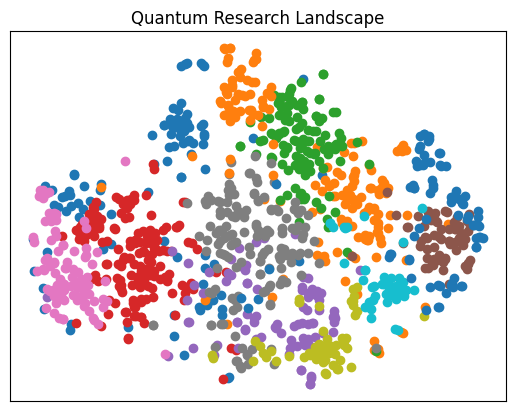

In [184]:
for it in range(12):
    temp = sub_df[sub_df['cluster'] == it]
    #outputs = pipeline([header,{'role':'user','content':'\n\n'.join(temp['abstract'].values)}],max_new_tokens=10)
    plt.scatter(temp['tsne'].map(lambda x: x[0]),temp['tsne'].map(lambda x: x[1]),)
#plt.legend(ncol=2)
plt.xticks([])
plt.yticks([])
plt.title('Quantum Research Landscape')
plt.show()

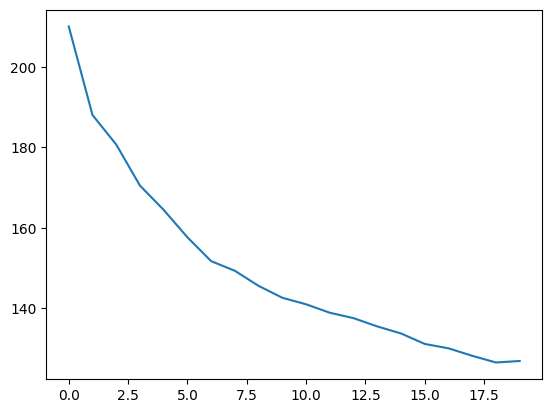

In [139]:
inertias = []
for i in range(20):
    temp = KMeans(n_clusters=i+1).fit(pca)
    inertias.append(temp.inertia_)
plt.plot(inertias)